<a href="https://colab.research.google.com/github/Keerthanabs1326/Ethnotech_GenAI/blob/main/cnn_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [ ]:
model = Sequential()

In [ ]:
# 🔹 Feature Extraction Layers
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9860 - loss: 0.0438 - val_accuracy: 0.9896 - val_loss: 0.0309
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.9878 - loss: 0.0422 - val_accuracy: 0.9905 - val_loss: 0.0257
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9894 - loss: 0.0332 - val_accuracy: 0.9918 - val_loss: 0.0243
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9923 - val_loss: 0.0213
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.9917 - loss: 0.0273 - val_accuracy: 0.9922 - val_loss: 0.0245
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.9916 - val_loss: 0.0277
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 95ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9923 - val_loss: 0.0258
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.9931 - loss: 0.0215 - 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9899 - loss: 0.0359
Test Accuracy: 0.9919999837875366


In [ ]:
feature_extractor = Model(
    inputs=model.layers[0].input,
    outputs=model.get_layer(index=6).output
)
feature_extractor.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,744 (874.00 KB)

 Trainable params: 223,744 (874.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_features = feature_extractor.predict(X_train)
test_features = feature_extractor.predict(X_test)

print("Train feature shape:", train_features.shape)
print("Test feature shape:", test_features.shape)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Train feature shape: (60000, 128)
Test feature shape: (10000, 128)


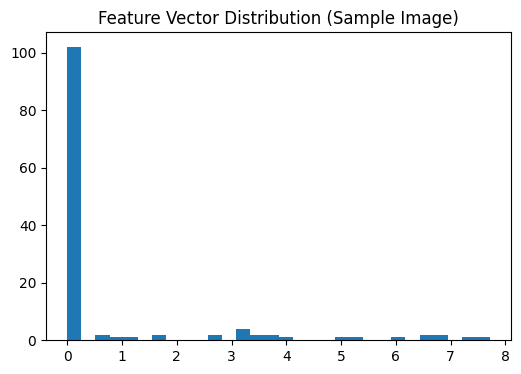

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(train_features[0], bins=30)
plt.title("Feature Vector Distribution (Sample Image)")
plt.show()

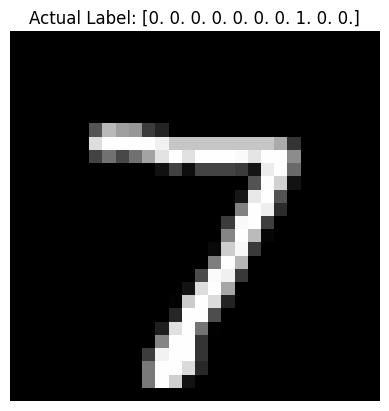

In [ ]:
plt.imshow(X_test[0], cmap="gray")
plt.title(f"Actual Label: {y_test[60]}")
plt.axis("off")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9899 - loss: 0.0359
Test Accuracy: 0.99200


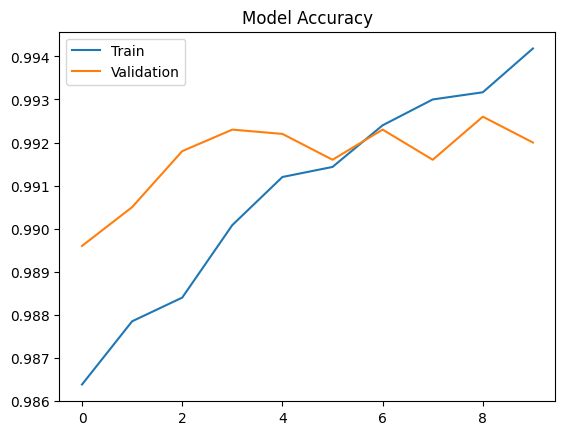

In [ ]:
import matplotlib.pyplot as plt
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.5f}")
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert y_test from one-hot encoded to single integer labels
predicted_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f"Predicted Accuracy (Model Accuracy): {predicted_accuracy * 100:.2f}%")

Predicted Accuracy (Model Accuracy): 99.20%


In [ ]:
actual_accuracy = accuracy_score(y_test, y_test)
print(f"Actual Accuracy (Ground Truth): {actual_accuracy * 100:.2f}%")

Actual Accuracy (Ground Truth): 100.00%
